In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

# Loading banglore home prices into a dataframe


In [2]:
data = pd.read_csv('house_price.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

*Drop features that are not required to build our model*

In [6]:
data = data.drop(columns=['area_type','society','balcony','availability'])
data.shape

(13320, 5)

# Data Cleaning: Handle NA values

In [7]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# dropping rows which contains null values and checking
data = data.dropna()
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
data.shape

(13246, 5)

In [10]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Feature Engineering

As "size" column has object values we are turning it into integer

In [11]:
data['size'] = data['size'].apply(lambda x: x.split(' ')[0])
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [12]:
data.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [13]:
data['size'] = data['size'].astype('int32')

In [14]:
data.dtypes

location       object
size            int32
total_sqft     object
bath          float64
price         float64
dtype: object

__Explore the "total_sqft" column:__

In [15]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

As the "total_sqft" contain some range in rows, we are going to convert then into single value by writing a function:

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
data[~data['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800


For such range cases we can just take average of min and max value in the range. There are other cases such as 34.46Sq which we are going to just drop such corner cases to keep things simple.



In [18]:
def covert_num(x):
    token = x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
data['total_sqft'] = data['total_sqft'].apply(covert_num)

In [20]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

Add new feature called price per square feet for visualisation

In [21]:
data['price_per_squarefeet'] = data['price']*100000/data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,price_per_squarefeet
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [22]:
data_stats = data['price_per_squarefeet'].describe()
data_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_squarefeet, dtype: float64

__Examine "location" which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations__



In [23]:
data.location = data.location.apply(lambda x: x.strip())
loc_stat = data['location'].value_counts().sort_values(ascending=False)
loc_stat

Whitefield                       535
Sarjapur  Road                   392
Electronic City                  304
Kanakpura Road                   266
Thanisandra                      236
                                ... 
Old Mangammanapalya Road           1
HAL Layout                         1
Gubbi Cross, Hennur Main Road      1
Jeevanhalli                        1
Abshot Layout                      1
Name: location, Length: 1293, dtype: int64

In [24]:
len(loc_stat[loc_stat<=10])

1052

# Dimensionality Reduction


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount.

In [25]:
loc_stat_less_than_10 = loc_stat[loc_stat<=10]
loc_stat_less_than_10

Ganga Nagar                      10
Nagadevanahalli                  10
Dodsworth Layout                 10
1st Block Koramangala            10
Kalkere                          10
                                 ..
Old Mangammanapalya Road          1
HAL Layout                        1
Gubbi Cross, Hennur Main Road     1
Jeevanhalli                       1
Abshot Layout                     1
Name: location, Length: 1052, dtype: int64

In [26]:
data['location'] = data['location'].apply(lambda x: 'other' if x in loc_stat_less_than_10 else x)
data.head(50)

,location,size,total_sqft,bath,price,price_per_squarefeet
0,Electronic City Phase II,2,1056.00,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.00,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.00,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.00,3.0,95.00,6245.890861
4,Kothanur,2,1200.00,2.0,51.00,4250.000000
5,Whitefield,2,1170.00,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.00,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.00,4.0,600.00,18181.818182
8,Marathahalli,3,1310.00,3.0,63.25,4828.244275
9,other,6,1020.00,6.0,370.00,36274.509804


# Outlier Removal Using Business Logic


As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft



In [27]:
data[(data['total_sqft']/data['size'])<300]

,location,size,total_sqft,bath,price,price_per_squarefeet
9,other,6,1020.0,6.0,370.0,36274.509804
45,HSR Layout,8,600.0,9.0,200.0,33333.333333
58,Murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,Devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000
...,...,...,...,...,...,...
13277,other,7,1400.0,7.0,218.0,15571.428571
13279,other,6,1200.0,5.0,130.0,10833.333333
13281,Margondanahalli,5,1375.0,5.0,125.0,9090.909091
13303,Vidyaranyapura,5,774.0,5.0,70.0,9043.927649


In [28]:
data = data[~(data['total_sqft']/data['size']<300)]
data.shape

(12502, 6)

# Outlier Removal Using Standard Deviation and Mean


In [29]:
data['price_per_squarefeet'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_squarefeet, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [30]:
def remove_out(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_squarefeet)
        std = np.std(subdf.price_per_squarefeet)
        reduced_df = subdf[(subdf.price_per_squarefeet>(m-std)) & (subdf.price_per_squarefeet<(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

data = remove_out(data)
data.shape

(10241, 6)

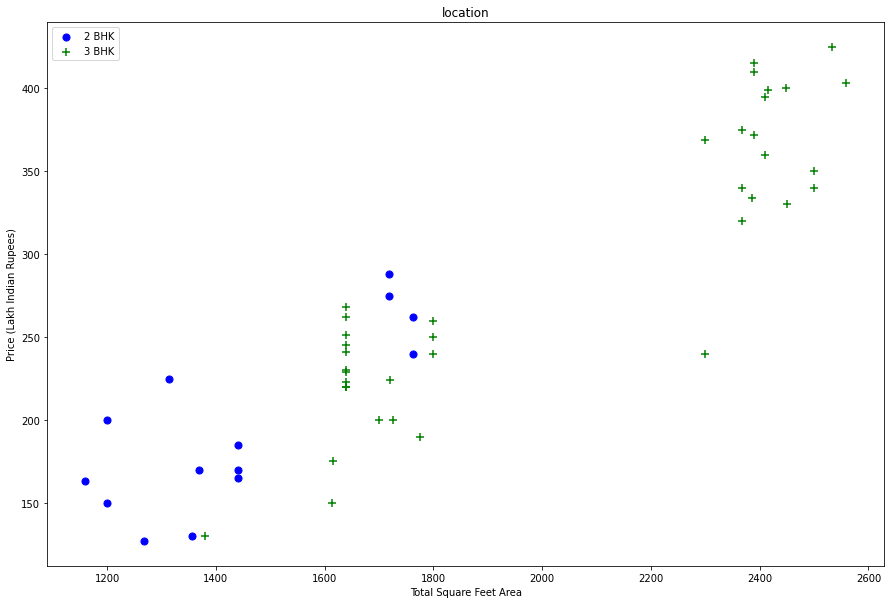

In [43]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['location'] == location) & (df['size']==2)]
    bhk3 = df[(df['location'] == location) & (df['size']==3)]
#     matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title('location')
    plt.legend()
   
plot_scatter_chart(data,'Rajaji Nagar')

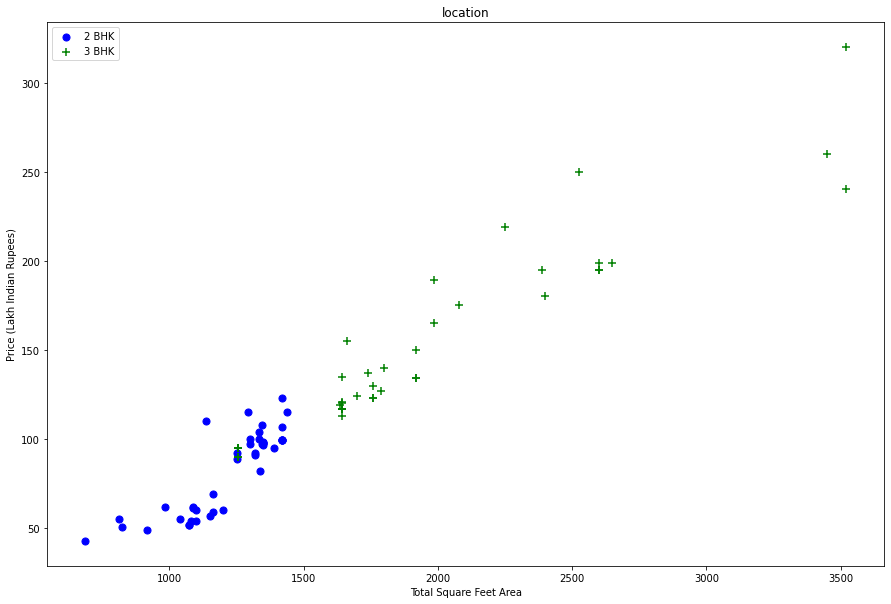

In [46]:
plot_scatter_chart(data,'Hebbal')

In [44]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_squarefeet),
                'std': np.std(bhk_df.price_per_squarefeet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_squarefeet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data = remove_bhk_outliers(data)
data.shape

(7329, 6)

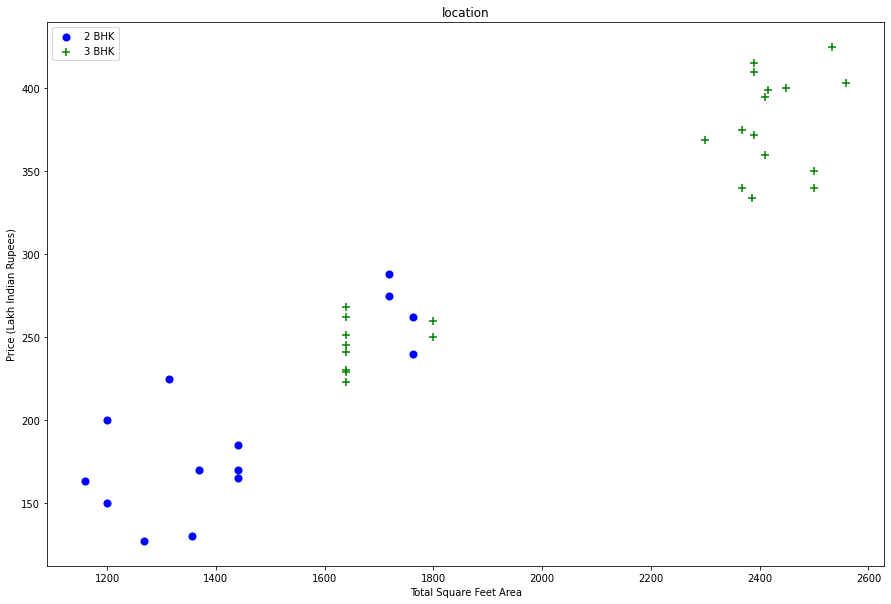

In [45]:
plot_scatter_chart(data,"Rajaji Nagar")

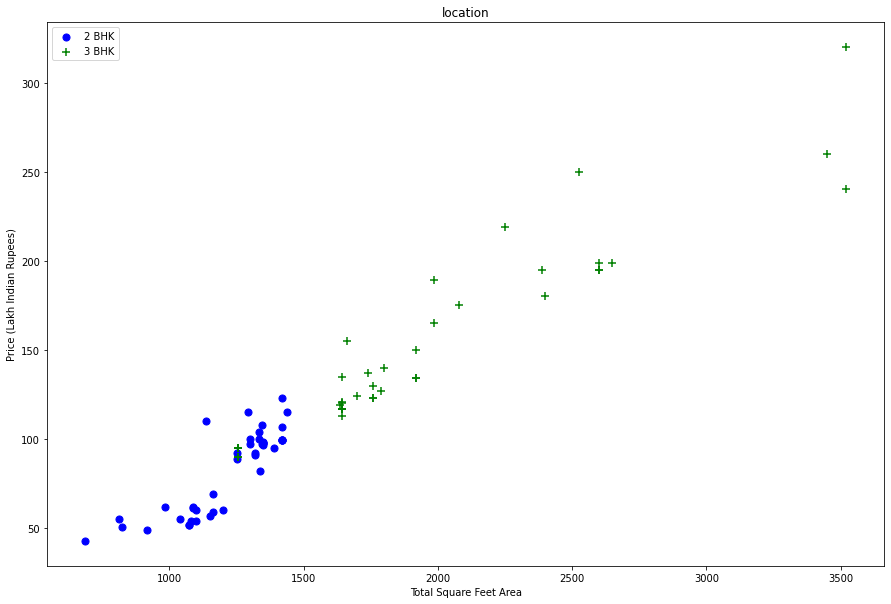

In [47]:
plot_scatter_chart(data,"Hebbal")


Based on above figures we can see that data points which were before(anomaly) are outliers and they are being removed due to remove_bhk_outliers function



Text(0, 0.5, 'Count')

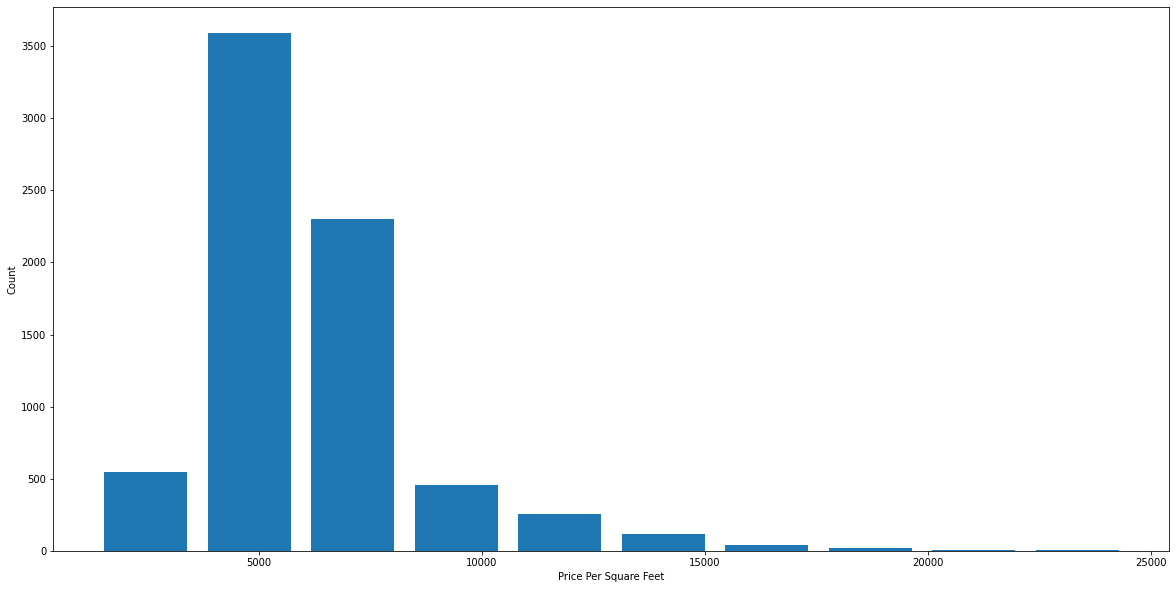

In [48]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data.price_per_squarefeet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

__Outlier Removal Using Bathrooms Feature__


In [49]:
data.rename(columns={'size':'BHK'},inplace=True)

In [50]:
data.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

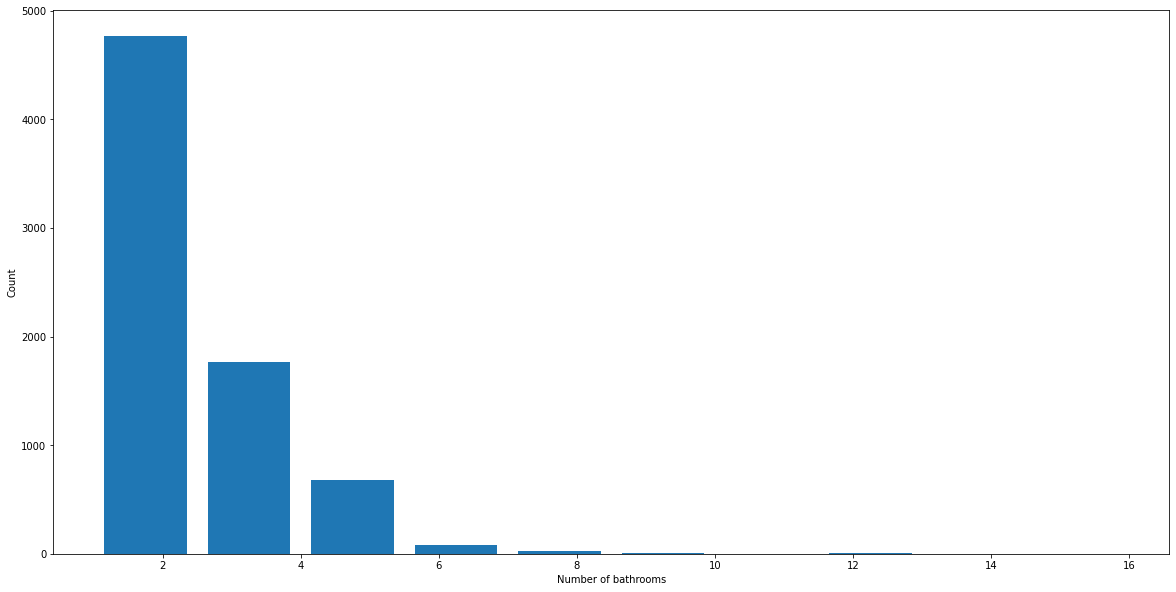

In [51]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Here in the plot we can see the outliers(bathroos=8,13)

In [52]:
data[data.bath>10]

,location,BHK,total_sqft,bath,price,price_per_squarefeet
5277,Neeladri Nagar,10,4000.0,12.0,160.0,4000.000000
8486,other,10,12000.0,12.0,525.0,4375.000000
8575,other,16,10000.0,16.0,550.0,5500.000000
9308,other,11,6000.0,12.0,150.0,2500.000000
9639,other,13,5425.0,13.0,275.0,5069.124424


__It is unusual to have 2 more bathrooms than number of bedrooms in a home__



In [53]:
data[data['bath']>data['BHK']+2]

,location,BHK,total_sqft,bath,price,price_per_squarefeet
1626,Chikkabanavar,4,2460.0,7.0,80.0,3252.032520
5238,Nagasandra,4,7000.0,8.0,450.0,6428.571429
6711,Thanisandra,3,1806.0,6.0,116.0,6423.034330
8411,other,6,11338.0,9.0,1000.0,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [54]:
data = data[~(data['bath']>data['BHK']+2)]

In [55]:
data.shape

(7325, 6)

In [56]:
data = data.drop(columns='price_per_squarefeet',axis=1)
data.head()

,location,BHK,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,3,1875.0,2.0,235.0
3,1st Block Jayanagar,3,1200.0,2.0,130.0
4,1st Block Jayanagar,2,1235.0,2.0,148.0


Now, our machine learning model can't interpret object containing attribute such as "location". So we are going to convert them into values using dummies.

In [57]:
dummies = pd.get_dummies(data.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data = pd.concat([data,dummies.drop('other',axis=1)],axis=1)
data

,location,BHK,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4,2850.0,4.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3,1630.0,3.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3,1875.0,2.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3,1200.0,2.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2,1235.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,2,1200.0,2.0,70.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1,1800.0,1.0,200.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,2,1353.0,2.0,110.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,1,812.0,1.0,26.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data.drop(columns='location',axis=1,inplace=True)

In [60]:
data.head()

,BHK,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Model Now...


In [61]:
data.shape

(7325, 245)

In [62]:
X = data.drop(columns='price',axis=1)
Y = data.price

In [63]:
X.shape

(7325, 244)

In [64]:
len(Y)

7325

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.8017674308563395

__Now we will use K Fold cross validation to measure accuracy of our LinearRegression model__


In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.85435491, 0.83563607, 0.82369758, 0.84409753, 0.81649097])

We can see that in 5 iterations we get a score above 80% all the time. 